In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!git clone https://github.com/kendor74/Crop-Recommendation.git

fatal: destination path 'Crop-Recommendation' already exists and is not an empty directory.


In [7]:
df = pd.read_csv('/content/drive/MyDrive/ML/data.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [13]:
kc_values = {
    'rice': 1.2,
    'maize': 1.2,
    'jute': 1.0,
    'cotton': 0.85,
    'coconut': 0.9,
    'papaya': 0.8,
    'orange': 0.75,
    'apple': 0.8,
    'muskmelon': 1.0,
    'watermelon': 1.0,
    'grapes': 0.75,
    'mango': 0.7,
    'banana': 1.0,
    'pomegranate': 0.8,
    'lentil': 0.9,
    'blackgram': 0.8,
    'mungbean': 0.9,
    'mothbeans': 0.8,
    'pigeonpeas': 0.9,
    'kidneybeans': 0.8,
    'chickpea': 0.85,
    'coffee': 1.1
}

df['Kc'] = df['label'].map(kc_values)
df

,N,P,K,temperature,humidity,ph,rainfall,label,Kc
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1.2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.2
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1.1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1.1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1.1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1.1


In [14]:
df.agg(['min','max'])

,N,P,K,temperature,humidity,ph,rainfall,label,Kc
min,0,5,5,8.825675,14.258040,3.504752,20.211267,apple,0.7
max,140,145,205,43.675493,99.981876,9.935091,298.560117,watermelon,1.2


In [15]:
df['sfi'] = (df['K'] + df['N'] + df['P'])/3

In [16]:
temperature = np.array(df['temperature'])
pet = 0.0023 * (temperature + 17.8) * np.sqrt(temperature) * (0.408)
df['pet'] = pet

In [17]:
df['smd'] = df['pet'] - df['rainfall']

In [18]:
df['thi'] = 0.8 * df['temperature'] + df['humidity'] / 100 * (df['temperature'] - 14.4) + 46.4


In [19]:
df['sqi'] = (df['N'] + df['P'] + df['K']) / 3 * df['ph']


In [20]:
df['CWR'] = df['pet'] * df['Kc']
df

,N,P,K,temperature,humidity,ph,rainfall,label,Kc,sfi,pet,smd,thi,sqi,CWR
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.2,58.333333,0.165857,-202.769679,68.417363,379.340809,0.199029
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.2,61.333333,0.173258,-226.482280,69.736298,431.669910,0.207909
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.2,53.000000,0.183655,-263.780593,71.886824,415.530979,0.220385
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1.2,49.666667,0.213921,-242.650113,77.284902,346.693245,0.256706
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.2,54.000000,0.159697,-262.557644,67.180242,411.937536,0.191636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1.1,57.666667,0.216440,-177.558067,76.038111,390.983683,0.238084
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1.1,47.000000,0.222178,-127.702432,75.706109,286.085351,0.244396
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1.1,60.333333,0.193298,-173.129541,72.247650,383.877340,0.212627
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1.1,61.000000,0.211985,-126.963308,73.606717,412.286346,0.233183


In [21]:
df.to_csv('crop_data.csv', index=False)

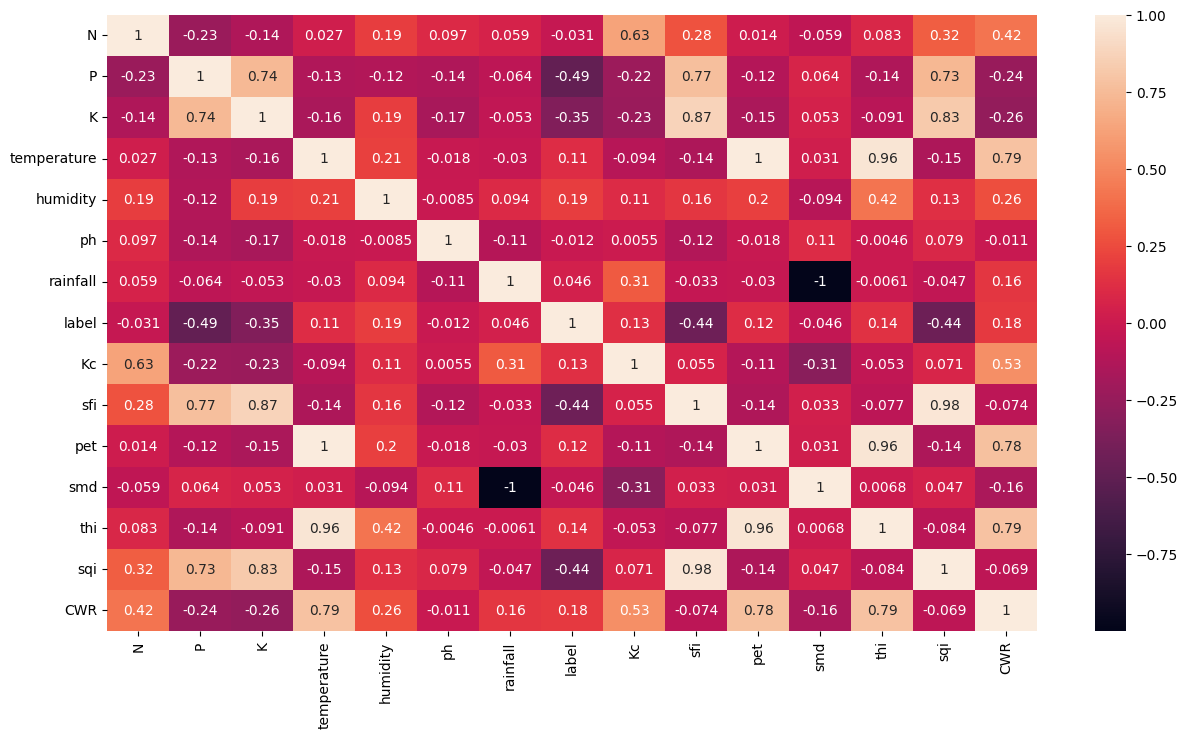

In [22]:
t = df.copy()
le = LabelEncoder()
t['label'] = le.fit_transform(t['label'])

plt.figure(figsize=(15, 8))
sns.heatmap(t.corr(), annot=True)
plt.show()

In [23]:
original_labels = le.inverse_transform(t['label'])
df_label = pd.DataFrame({'Original_Labels': original_labels, 'Category': t['label']})
df_label.drop_duplicates(inplace=True)
df_label.reset_index(drop=True, inplace=True)
df_label

,Original_Labels,Category
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


In [24]:
scatter_matrix = px.scatter_matrix(df, dimensions=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], color='label')
scatter_matrix.update_layout(title='Scatter Matrix of Features', width=1200, height=800)
scatter_matrix.show()


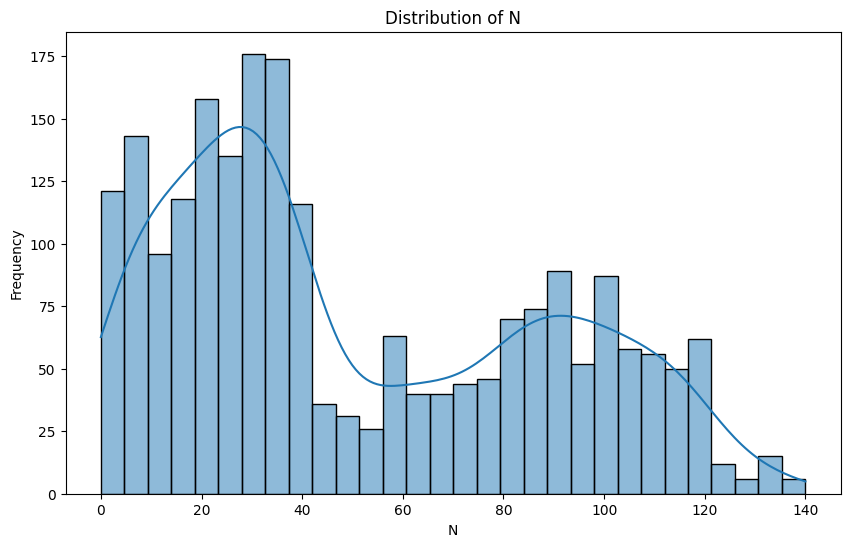

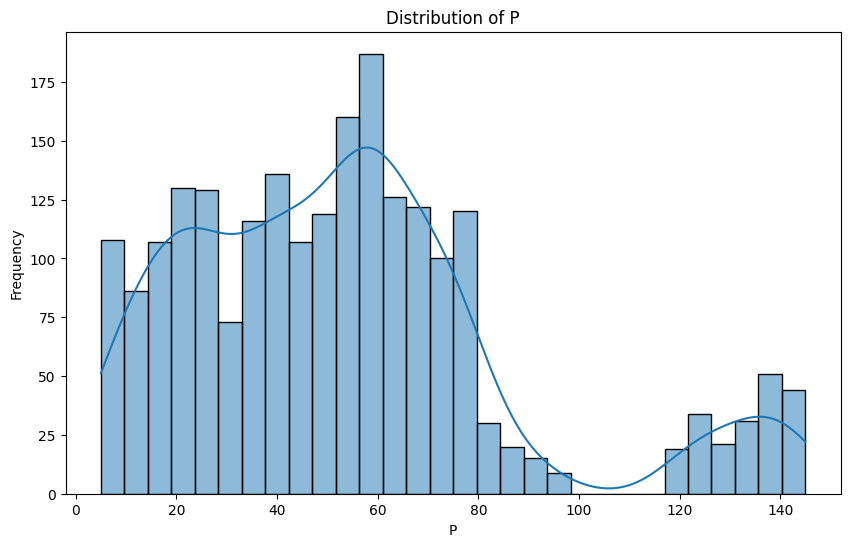

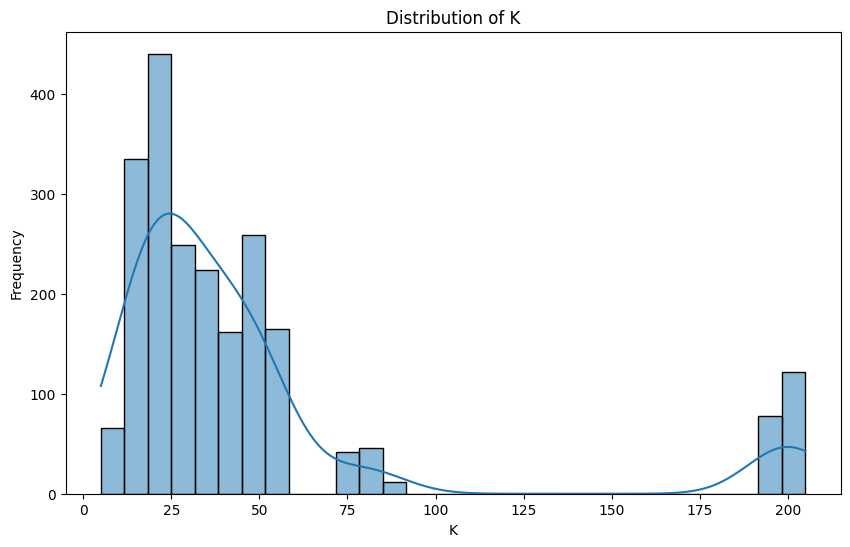

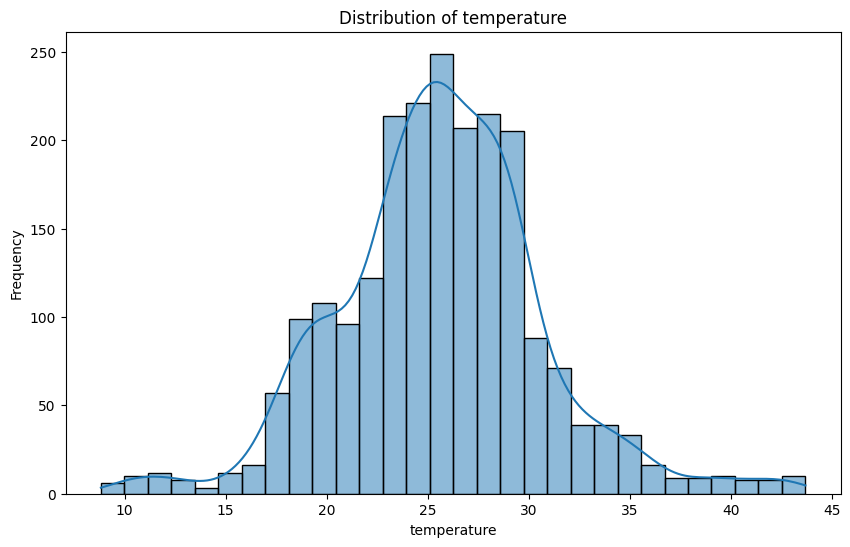

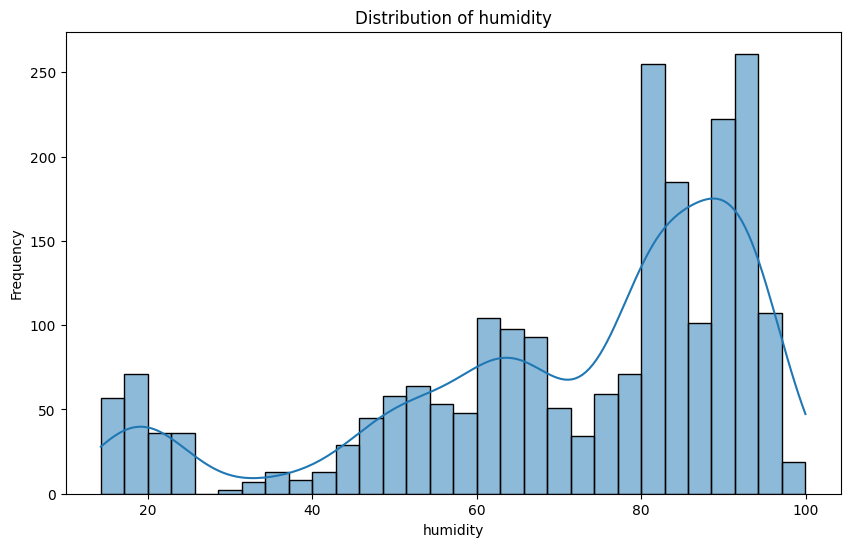

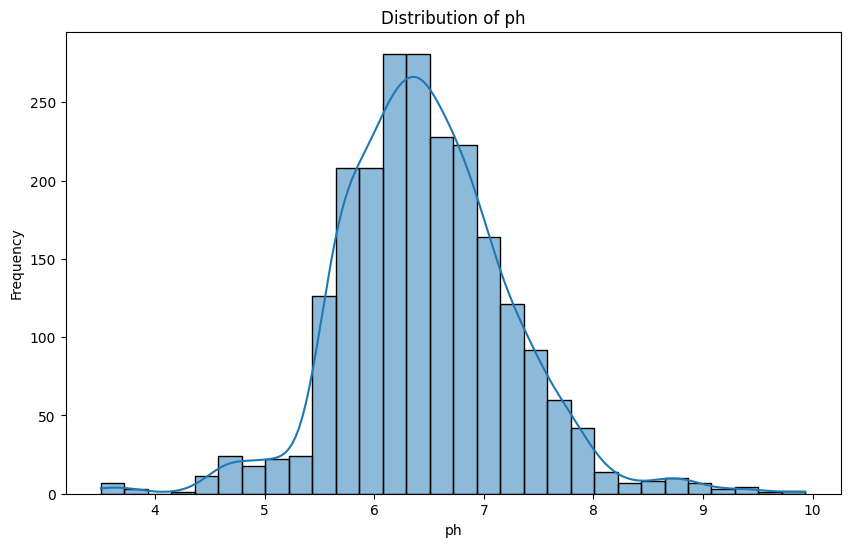

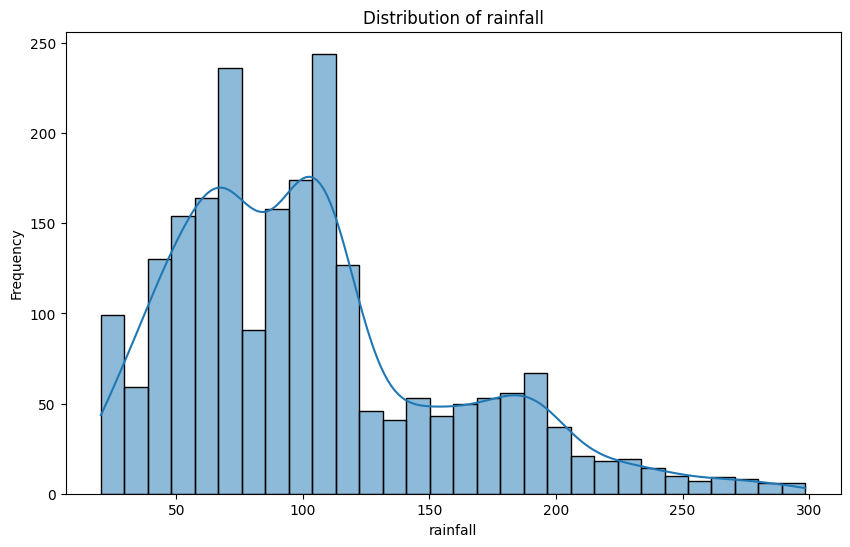

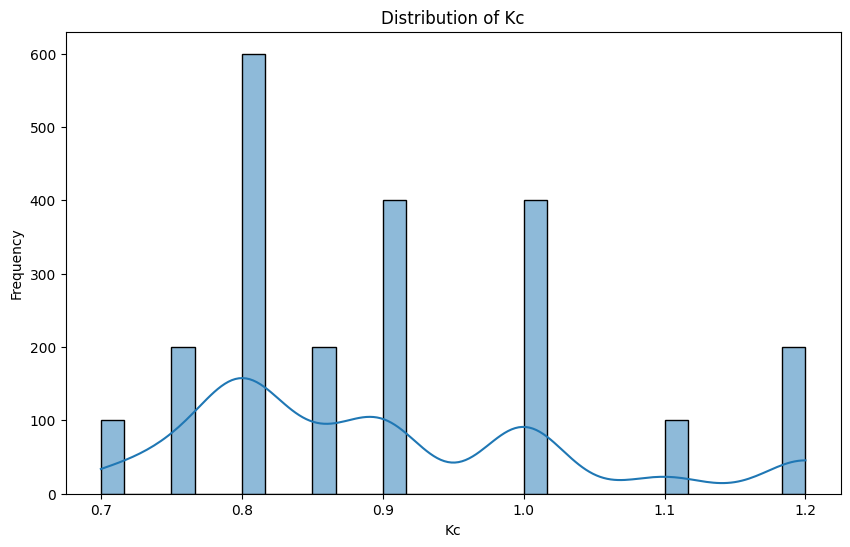

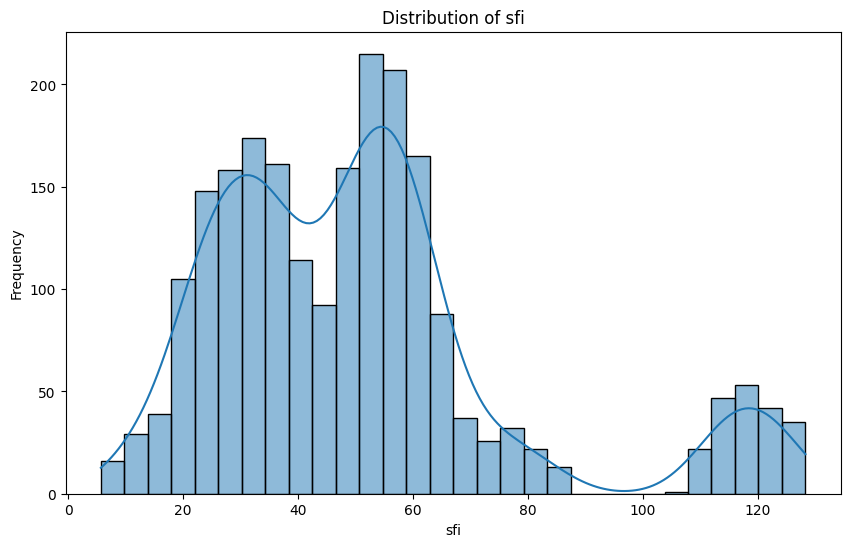

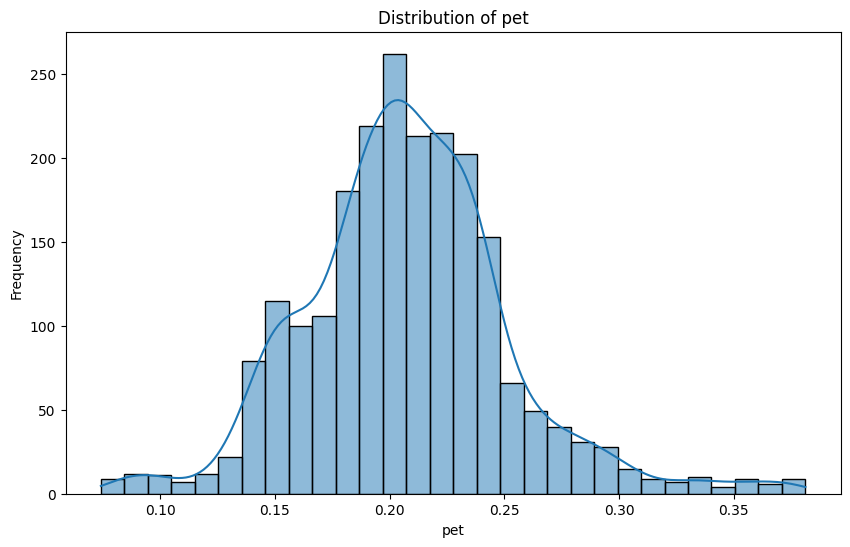

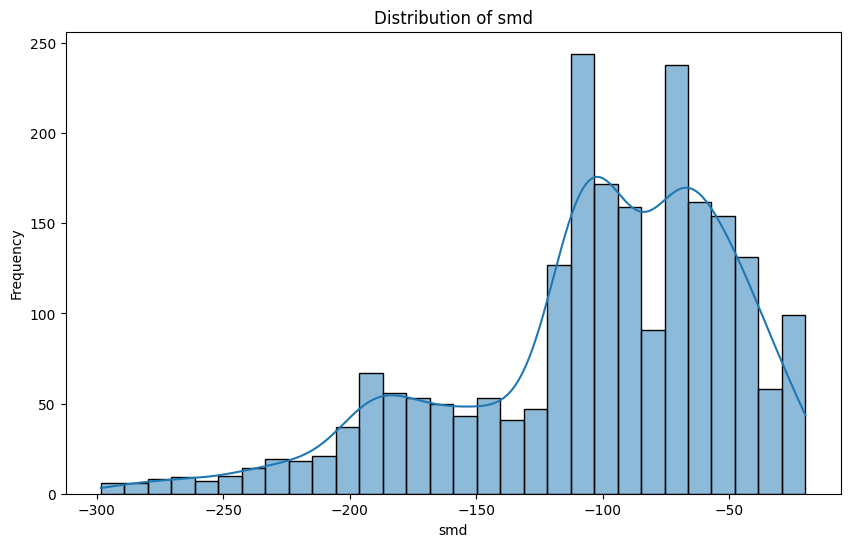

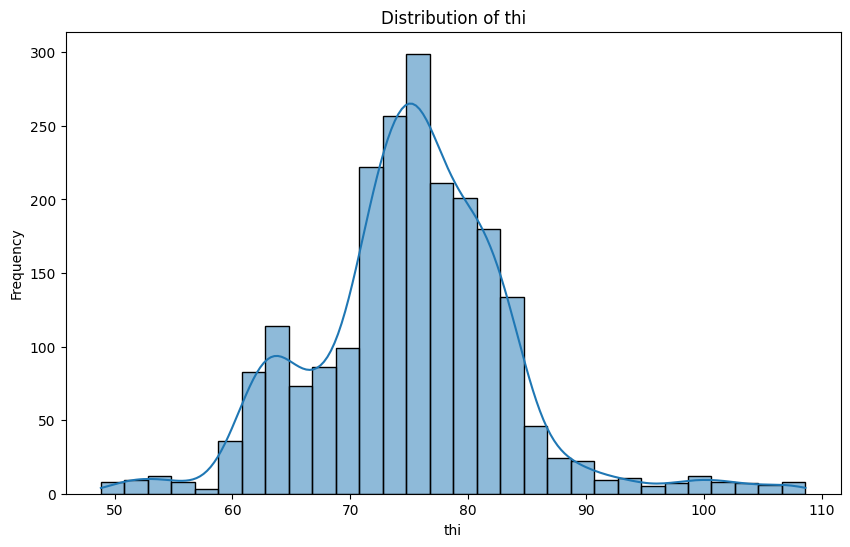

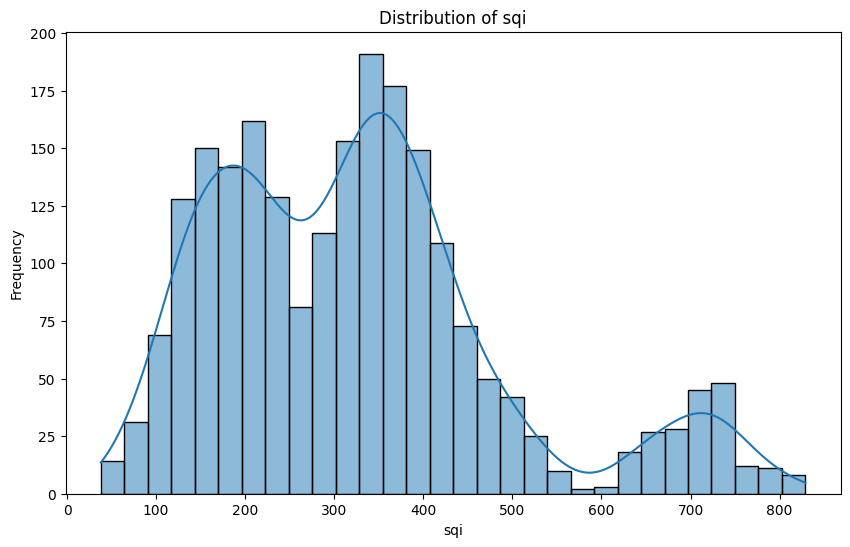

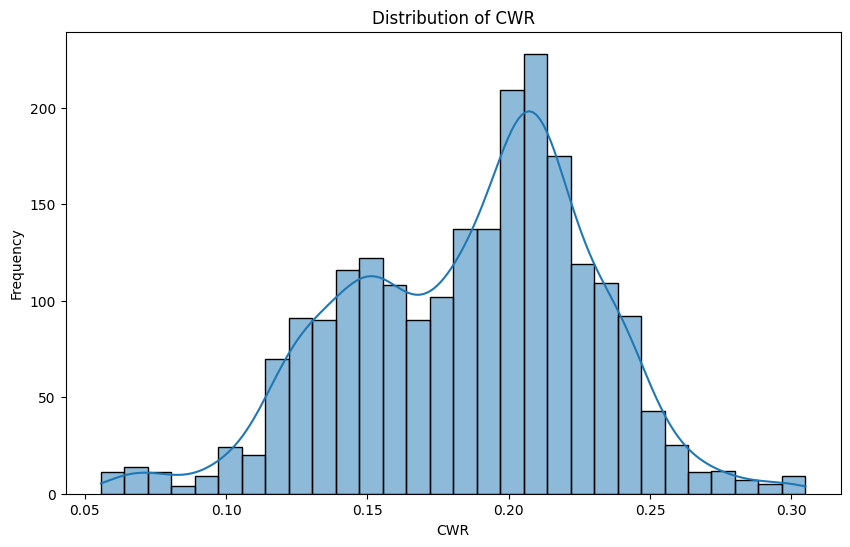

In [25]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Kc', 'sfi', 'pet', 'smd', 'thi', 'sqi', 'CWR']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [26]:
fig = px.scatter(df, x='sqi', y='thi', color='label', size='CWR', hover_data=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
fig.update_layout(title='Crop Recommendation based on SQI and THI', xaxis_title='SQI', yaxis_title='THI')
fig.show()
plt.savefig('accuracy_plot.png')

<Figure size 640x480 with 0 Axes>

In [27]:
fig = px.scatter_3d(df, x='sqi', y='thi', z='CWR', color='label',
                    hover_data=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
                    title='3D Scatter Plot of SQI, THI, and CWR',
                    labels={'sqi': 'SQI', 'thi': 'THI', 'CWR': 'CWR'},
                    opacity=0.7)

# Show the plot
fig.show()

In [28]:
fig = px.scatter_3d(df,
                    x='sqi',
                    y='thi',
                    z='CWR',
                    color='label',
                    size='Kc',
                    hover_data=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
                    title='3D Scatter Plot of Crop Data',
                    labels={'sqi': 'Soil Quality Index (SQI)',
                            'thi': 'Temperature Humidity Index (THI)',
                            'CWR': 'Crop Water Requirement (CWR)'},
                    opacity=0.7)
fig.show()

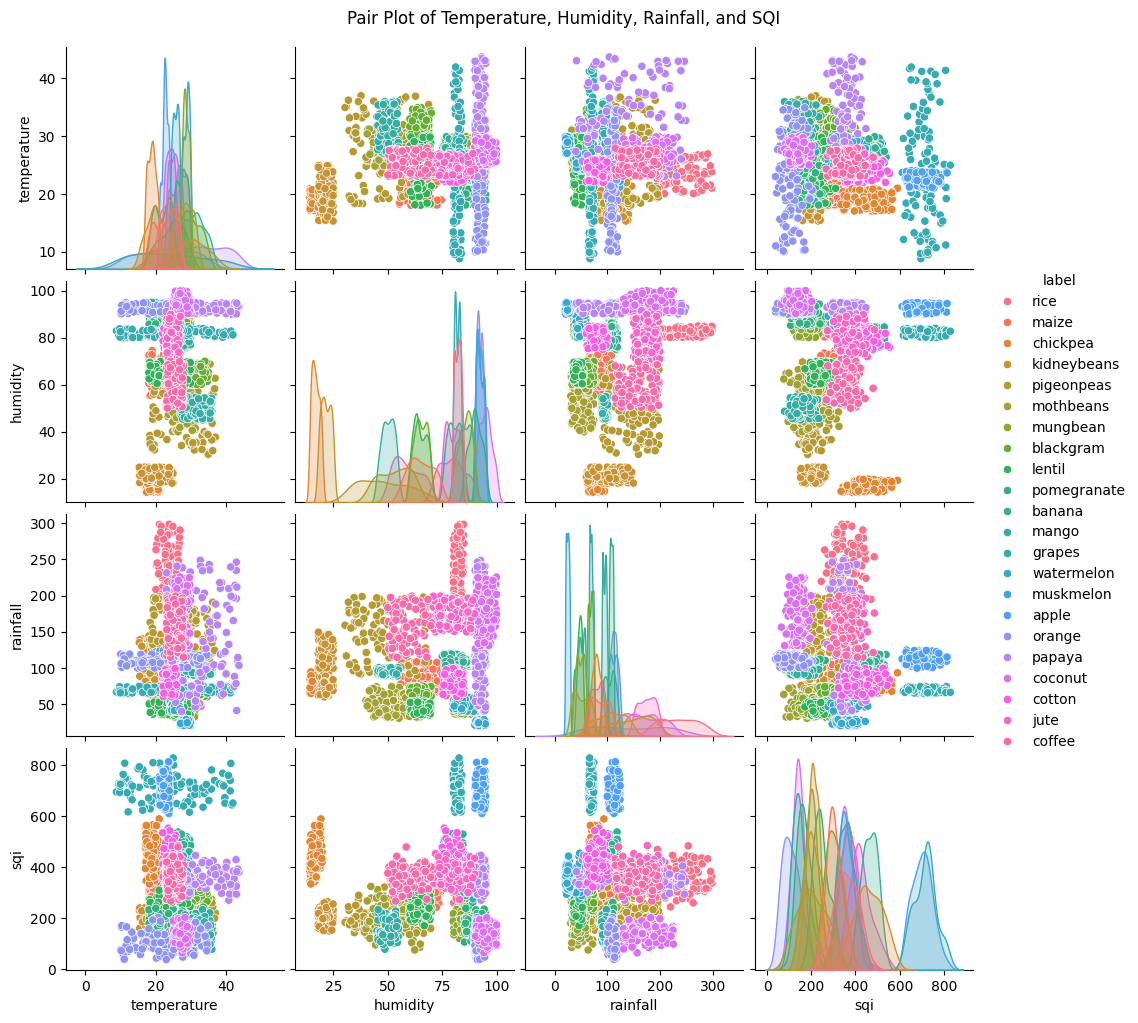

<Figure size 640x480 with 0 Axes>

In [29]:
summary_stats = df.describe()
# Pair Plot
sns.pairplot(df, vars=['temperature', 'humidity', 'rainfall', 'sqi'], hue='label', palette='husl')
plt.suptitle('Pair Plot of Temperature, Humidity, Rainfall, and SQI', y=1.02)
plt.show()
plt.savefig('accuracy_plot.png')

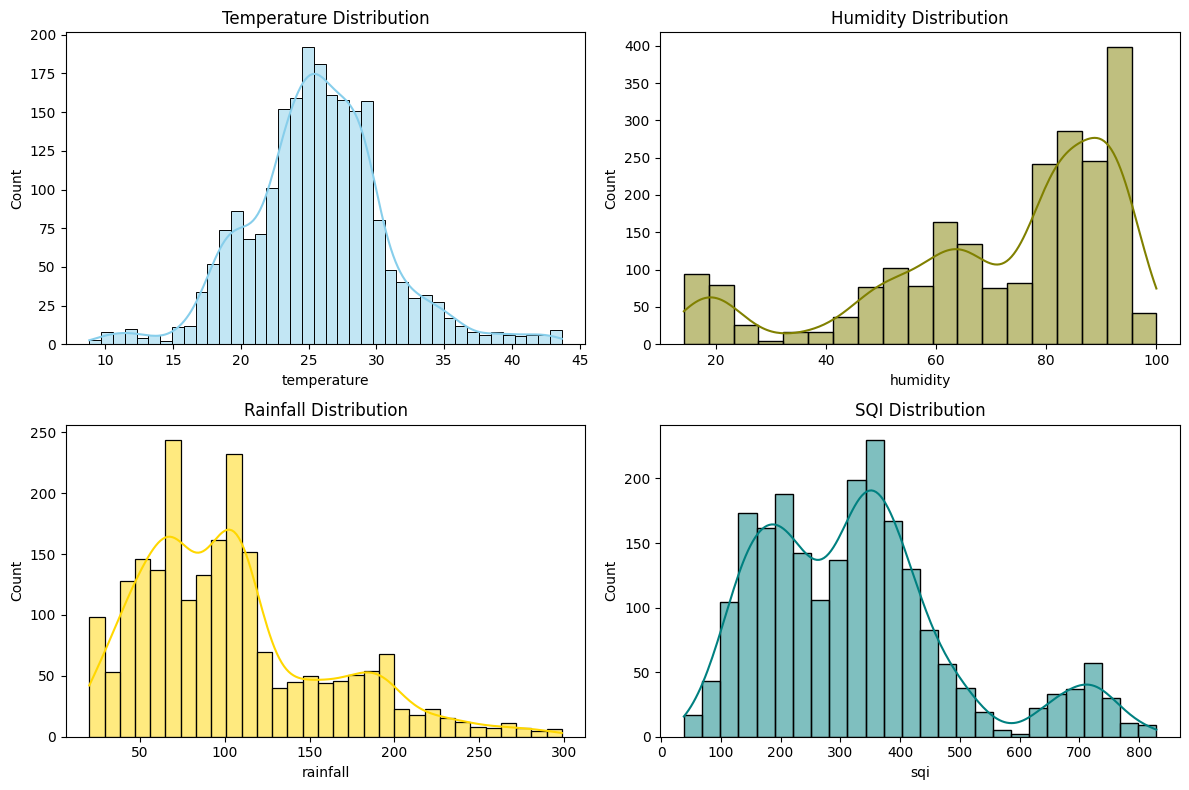

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['temperature'], kde=True, color='skyblue')
plt.title('Temperature Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['humidity'], kde=True, color='olive')
plt.title('Humidity Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['rainfall'], kde=True, color='gold')
plt.title('Rainfall Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['sqi'], kde=True, color='teal')
plt.title('SQI Distribution')

plt.tight_layout()
plt.show()
plt.savefig('accuracy_plot.png')

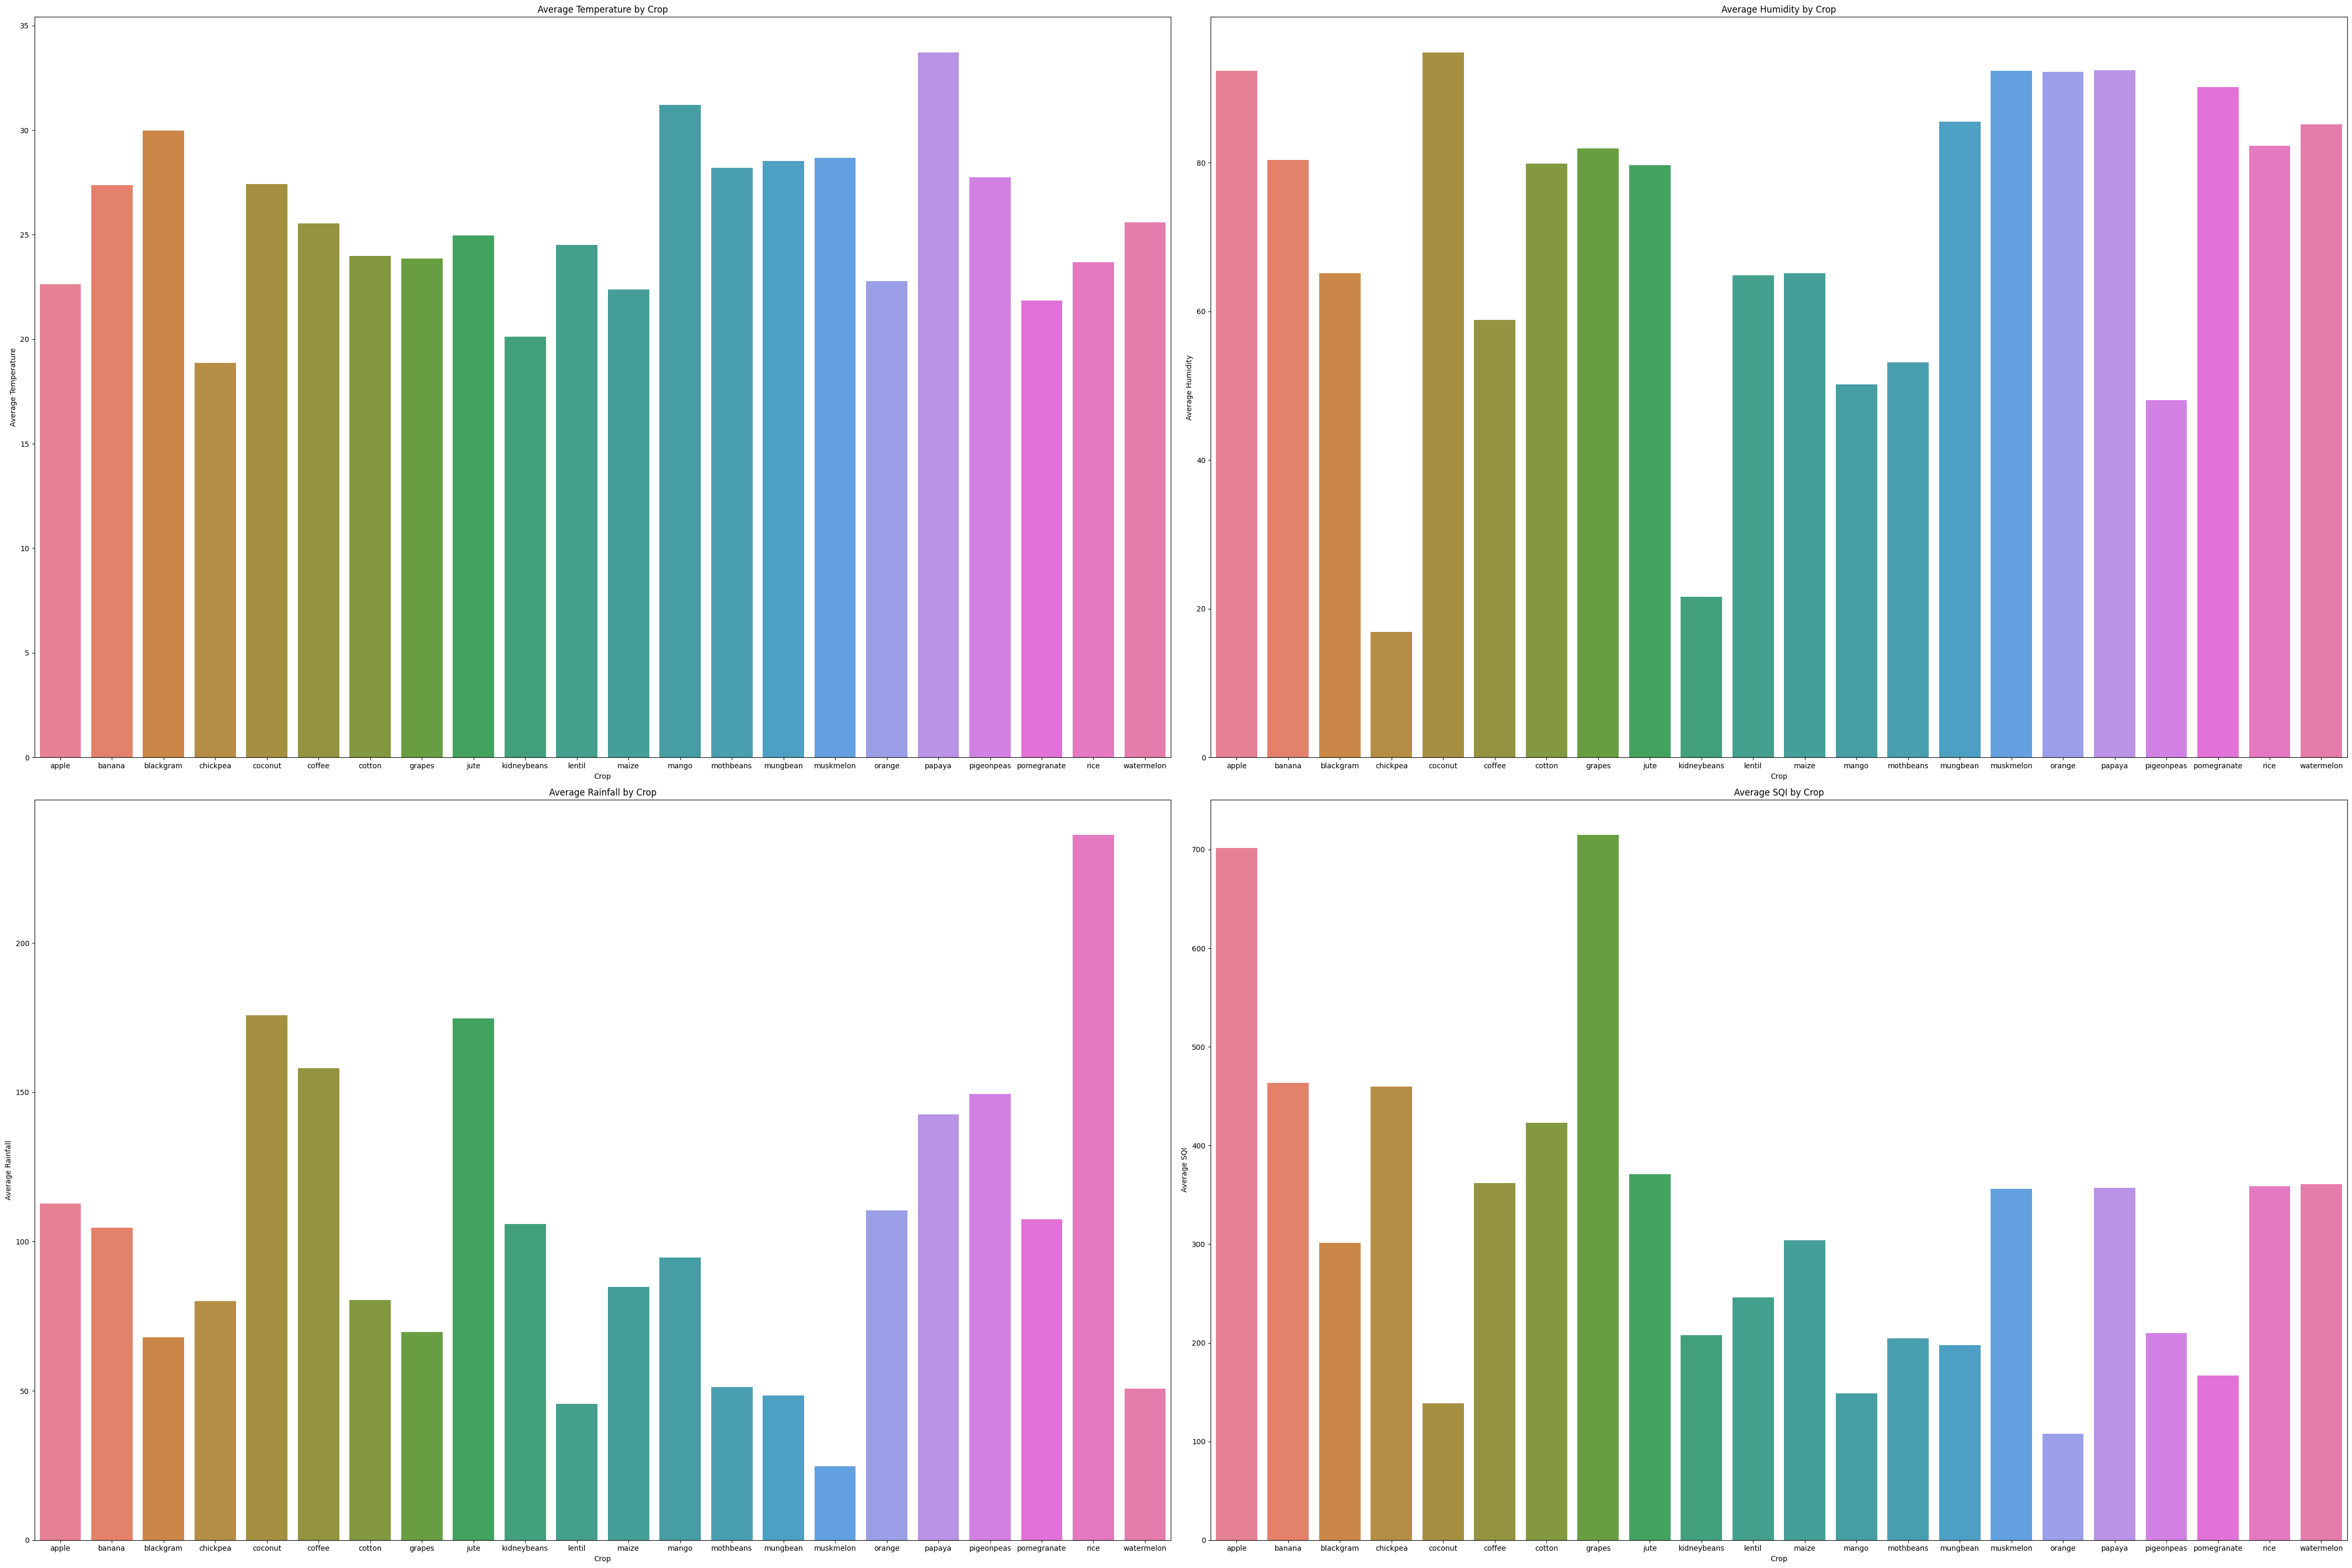

In [31]:
avg_df = df.groupby('label').mean().reset_index()

# Plot the average values
plt.figure(figsize=(45, 30))

plt.subplot(2, 2, 1)
sns.barplot(x='label', y='temperature', data=avg_df, palette='husl')
plt.title('Average Temperature by Crop')
plt.xlabel('Crop')
plt.ylabel('Average Temperature')

plt.subplot(2, 2, 2)
sns.barplot(x='label', y='humidity', data=avg_df, palette='husl')
plt.title('Average Humidity by Crop')
plt.xlabel('Crop')
plt.ylabel('Average Humidity')

plt.subplot(2, 2, 3)
sns.barplot(x='label', y='rainfall', data=avg_df, palette='husl')
plt.title('Average Rainfall by Crop')
plt.xlabel('Crop')
plt.ylabel('Average Rainfall')

plt.subplot(2, 2, 4)
sns.barplot(x='label', y='sqi', data=avg_df, palette='husl')
plt.title('Average SQI by Crop')
plt.xlabel('Crop')
plt.ylabel('Average SQI')

plt.tight_layout()
plt.show()

In [32]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,Kc,sfi,pet,smd,thi,sqi,CWR
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,0.900000,50.687879,0.207566,-103.256089,75.141935,325.456899,0.186130
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,0.136546,26.639556,0.044682,54.959747,8.393384,163.607426,0.043165
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.700000,5.666667,0.074227,-298.369409,48.839561,38.017041,0.055670
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,0.800000,31.333333,0.181661,-124.082153,70.959381,197.871787,0.152933
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,0.875000,48.666667,0.206050,-94.706359,75.318860,316.353744,0.194025
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,1.000000,59.666667,0.232508,-64.296077,79.990986,399.969625,0.216045
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,1.200000,128.333333,0.381249,-19.986310,108.598476,829.024989,0.304999


In [33]:
crop = df.groupby('label')[['temperature','humidity','sqi','rainfall']].agg(['min','max'])
crop

temperature              humidity                    sqi  \
                    min        max        min        max         min   
label                                                                  
apple         21.036527  23.996862  90.025751  94.920481  611.115172   
banana        25.010185  29.908885  75.031933  84.978492  378.977405   
blackgram     25.097374  34.946616  60.065349  69.961000  230.255020   
chickpea      17.024985  20.995022  14.258040  19.969789  334.893659   
coconut       25.008724  29.869083  90.017345  99.981876   64.900639   
coffee        23.059519  27.923744  50.045570  69.948073  267.935519   
cotton        22.000851  25.992374  75.005393  84.876690  322.966889   
grapes         8.825675  41.948657  80.016394  83.983517  616.445486   
jute          23.094338  26.985822  70.882596  89.891065  273.517998   
kidneybeans   15.330426  24.923601  18.092240  24.969699  150.544950   
lentil        18.064861  29.944139  60.091166  69.923759  171.159635   
maize         18.041855  26.549864  55.282204  74.829137  231.001349   
mango         27.003155  35.990097  45.022364  54.964053   78.965268   
mothbeans     24.018254  31.999286  40.009334  64.955854   75.936300   
mungbean      27.014704  29.914544  80.034996  89.996156  120.933067   
muskmelon     27.024151  29.943492  90.015064  94.962187  294.435514   
orange        10.010813  34.906653  90.006217  94.964199   38.017041   
papaya        23.012402  43.675493  90.038631  94.944821  271.276236   
pigeonpeas    18.319104  36.977944  30.400468  69.691413  131.768210   
pomegranate   18.071330  24.962732  85.129122  94.998975   84.089722   
rice          20.045414  26.929951  80.122675  84.969072  243.591606   
watermelon    24.043558  26.986037  80.026213  89.984052  276.265518   

                           rainfall              
                    max         min         max  
label                                            
apple        814.282456  100.117344  124.983162  
banana       538.595899   90.109781  119.847970  
blackgram    398.378407   60.417903   74.915595  
chickpea     589.931049   65.113656   94.781896  
coconut      202.669566  131.090008  225.632366  
coffee       479.937913  115.156401  199.473564  
cotton       553.641792   60.653817   99.931008  
grapes       829.024989   65.010953   74.915062  
jute         485.643143  150.235524  199.836291  
kidneybeans  265.591503   60.275525  149.744103  
lentil       341.264199   35.034848   54.939377  
maize        399.060541   60.651715  109.751538  
mango        234.092632   89.291476  100.812466  
mothbeans    337.793085   30.920140   74.443307  
mungbean     269.489612   36.120429   59.872321  
muskmelon    444.315239   20.211267   29.866814  
orange       203.567188  100.173796  119.694658  
papaya       447.118633   40.351531  248.859299  
pigeonpeas   322.684652   90.054227  198.829881  
pomegranate  262.851512  102.518476  112.475094  
rice         484.436384  182.561632  298.560117  
watermelon   455.599335   40.126504   59.759800

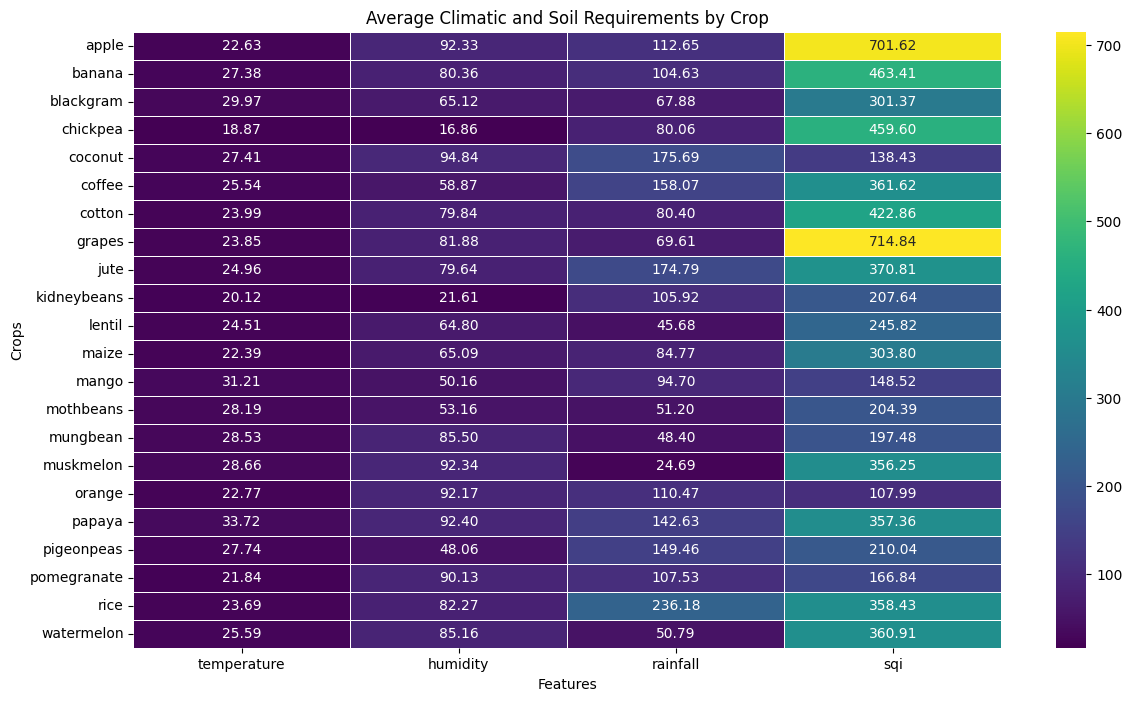

<Figure size 640x480 with 0 Axes>

In [34]:
features = ['temperature', 'humidity', 'rainfall', 'sqi']
average_requirements = df.groupby('label')[features].mean().reset_index()


heatmap_data = average_requirements.set_index('label')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Average Climatic and Soil Requirements by Crop')
plt.xlabel('Features')
plt.ylabel('Crops')
plt.show()
plt.savefig('accuracy_plot.png')

In [35]:
agg_min_max = df.groupby('label').agg(['min', 'max'])
agg_min_max['temperature'].sort_values(['min','max'],ascending=True)

,min,max
label,,
grapes,8.825675,41.948657
orange,10.010813,34.906653
kidneybeans,15.330426,24.923601
chickpea,17.024985,20.995022
maize,18.041855,26.549864
lentil,18.064861,29.944139
pomegranate,18.071330,24.962732
pigeonpeas,18.319104,36.977944
rice,20.045414,26.929951


In [36]:
# prompt: get the mean for all the df
df1 = df.drop(columns=['label'])
df1.mean()

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
Kc               0.900000
sfi             50.687879
pet              0.207566
smd           -103.256089
thi             75.141935
sqi            325.456899
CWR              0.186130
dtype: float64

In [37]:
df.groupby('label').mean()

,N,P,K,temperature,humidity,ph,rainfall,Kc,sfi,pet,smd,thi,sqi,CWR
label,,,,,,,,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779,0.80,118.303333,0.180527,-112.474252,72.105830,701.623317,0.144422
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980,1.00,77.430000,0.221923,-104.405057,78.720993,463.410147,0.221923
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151,0.80,42.243333,0.245806,-67.638345,80.523970,301.372402,0.196645
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977,0.85,62.600000,0.149579,-79.909399,62.254313,459.600923,0.127142
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646,0.90,23.166667,0.222214,-175.464432,80.662455,138.433809,0.199992
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295,1.10,53.293333,0.205659,-157.860635,73.384679,361.624294,0.226225
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043,0.85,61.190000,0.192137,-80.205906,73.247108,422.856716,0.163317
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829,0.75,118.606667,0.195884,-69.415945,73.232108,714.840524,0.146913
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798,1.00,55.083333,0.200530,-174.592268,74.774287,370.807902,0.200530


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
# Encoding label
lb = LabelEncoder()
nn = df.copy()
nn['label'] = lb.fit_transform(nn['label'])
nn

,N,P,K,temperature,humidity,ph,rainfall,label,Kc,sfi,pet,smd,thi,sqi,CWR
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,1.2,58.333333,0.165857,-202.769679,68.417363,379.340809,0.199029
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,1.2,61.333333,0.173258,-226.482280,69.736298,431.669910,0.207909
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,1.2,53.000000,0.183655,-263.780593,71.886824,415.530979,0.220385
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,1.2,49.666667,0.213921,-242.650113,77.284902,346.693245,0.256706
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,1.2,54.000000,0.159697,-262.557644,67.180242,411.937536,0.191636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5,1.1,57.666667,0.216440,-177.558067,76.038111,390.983683,0.238084
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5,1.1,47.000000,0.222178,-127.702432,75.706109,286.085351,0.244396
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5,1.1,60.333333,0.193298,-173.129541,72.247650,383.877340,0.212627
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5,1.1,61.000000,0.211985,-126.963308,73.606717,412.286346,0.233183


In [39]:
nn = nn[['N','P','K','temperature','humidity','ph','rainfall','label']]
nn

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [40]:
X = nn.drop(columns=['label'], axis=1)
y = nn['label']

# Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [42]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

Y_train_encoded = to_categorical(Y_train, num_classes=22)
# Define the model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation="selu", input_shape=(X_train.shape[1],)))
ann.add(tf.keras.layers.Dense(units=128, activation="selu"))
ann.add(tf.keras.layers.Dense(units=64, activation="relu"))
ann.add(tf.keras.layers.Dense(units=22, activation="softmax"))  # Output layer with 22 units for 22 classes

# Compile the model
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = ann.fit(X_train, Y_train_encoded, epochs=1000, batch_size=64, validation_split=0.25)

Epoch 1/1000
21/21 [==============================] - 2s 24ms/step - loss: 2.3840 - accuracy: 0.3977 - val_loss: 1.7380 - val_accuracy: 0.5886
Epoch 2/1000
21/21 [==============================] - 0s 6ms/step - loss: 1.2771 - accuracy: 0.6758 - val_loss: 0.9316 - val_accuracy: 0.7614
Epoch 3/1000
21/21 [==============================] - 0s 7ms/step - loss: 0.6841 - accuracy: 0.8674 - val_loss: 0.5119 - val_accuracy: 0.8795
Epoch 4/1000
21/21 [==============================] - 0s 7ms/step - loss: 0.4026 - accuracy: 0.9220 - val_loss: 0.3436 - val_accuracy: 0.9045
Epoch 5/1000
21/21 [==============================] - 0s 7ms/step - loss: 0.2762 - accuracy: 0.9402 - val_loss: 0.2671 - val_accuracy: 0.9318
Epoch 6/1000
21/21 [==============================] - 0s 9ms/step - loss: 0.2110 - accuracy: 0.9568 - val_loss: 0.2050 - val_accuracy: 0.9500
Epoch 7/1000
21/21 [==============================] - 0s 8ms/step - loss: 0.1655 - accuracy: 0.9674 - val_loss: 0.1785 - val_accuracy: 0.9477
Epoch

In [43]:
Y_test_encoded = to_categorical(Y_test, num_classes=22)

# Evaluate the model
loss, accuracy = ann.evaluate(X_test, Y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


14/14 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.9750
Test Accuracy: 97.50%


In [44]:
y_pred = ann.predict(X_test)
y_pred

14/14 [==============================] - 0s 2ms/step


array([[4.7137588e-26, 1.1251740e-25, 0.0000000e+00, ..., 3.6889157e-29,
        0.0000000e+00, 7.7723839e-19],
       [1.2428469e-20, 7.6335949e-29, 0.0000000e+00, ..., 7.8020681e-17,
        1.6877404e-32, 9.9999994e-01],
       [5.3898269e-22, 2.4757966e-16, 6.9992978e-27, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.9817196e-34, 2.9618657e-22, 6.0751441e-32, ..., 5.8329422e-33,
        3.1615861e-29, 3.9739424e-19],
       [1.0074300e-25, 6.9478825e-13, 3.4059999e-17, ..., 2.4297962e-26,
        1.6046864e-19, 1.4806967e-15],
       [8.0634155e-34, 1.3658479e-33, 6.0205398e-27, ..., 3.4059687e-32,
        4.8544745e-37, 0.0000000e+00]], dtype=float32)

In [45]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

In [46]:
vis = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': train_loss,
    'Validation Loss': val_loss
})

# Melt the DataFrame for Plotly Express
df_melted = vis.melt(id_vars='Epoch', var_name='Loss Type', value_name='Loss')

# Create the line plot
fig = px.line(df_melted, x='Epoch', y='Loss', color='Loss Type',
              title='Training and Validation Loss Over Epochs',
              labels={'Loss': 'Loss', 'Epoch': 'Epoch'})

# Show the plot
fig.show()

In [47]:
!pip install Flask tensorflow

In [48]:
import tensorflow as tf
from tensorflow.keras.models import load_model
ann.save('crop_model.h5')